In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import matplotlib.dates as mdates
import yfinance as yf
from datetime import datetime, timedelta
import os

[*********************100%***********************]  1 of 1 completed
Data collected for CARL-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for COLO-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for DANSKE.CO
[*********************100%***********************]  1 of 1 completed
Data collected for DSV.CO
[*********************100%***********************]  1 of 1 completed
Data collected for MAERSK-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for NOVO-B.CO
[*********************100%***********************]  1 of 1 completed
Data collected for GN.CO
[*********************100%***********************]  1 of 1 completed
Data collected for ORSTED.CO
[*********************100%***********************]  1 of 1 completed
Data collected for PNDORA.CO
[*********************100%***********************]  1 of 1 completed
Data collected for RBREW.CO
[*********************100%

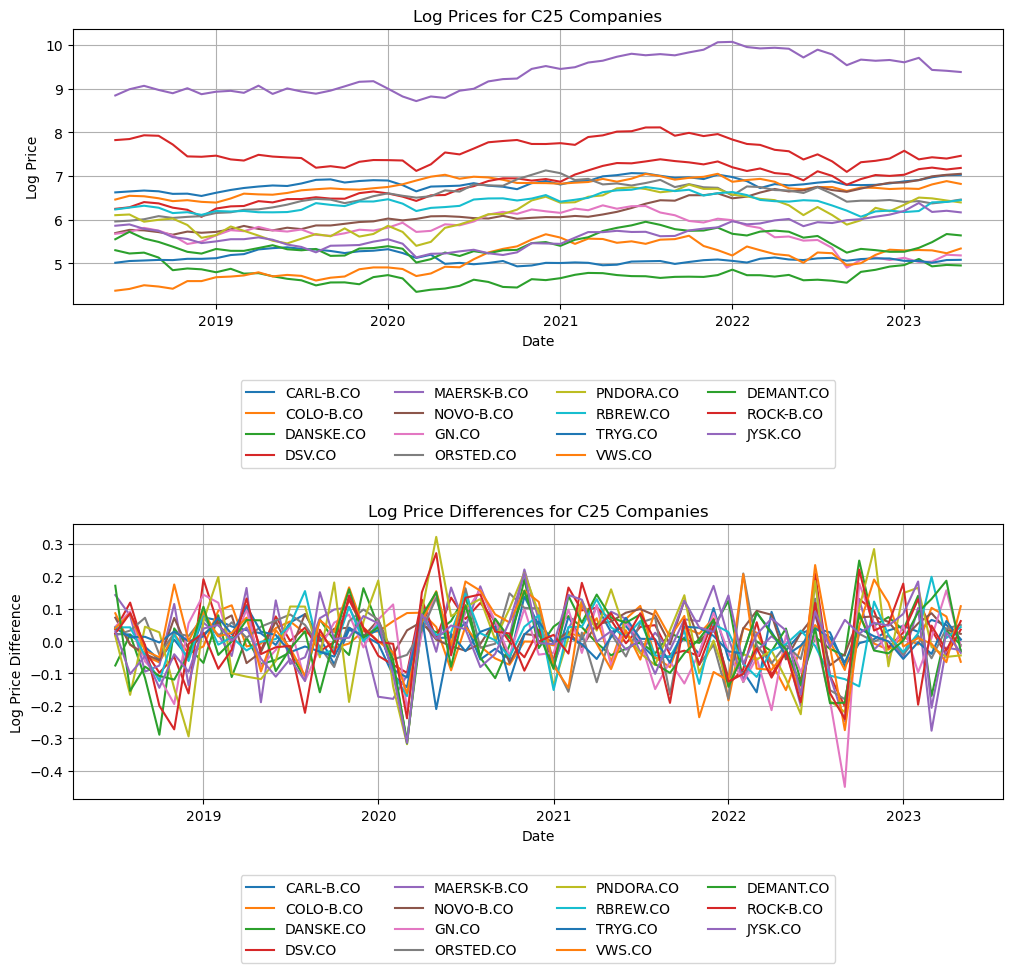

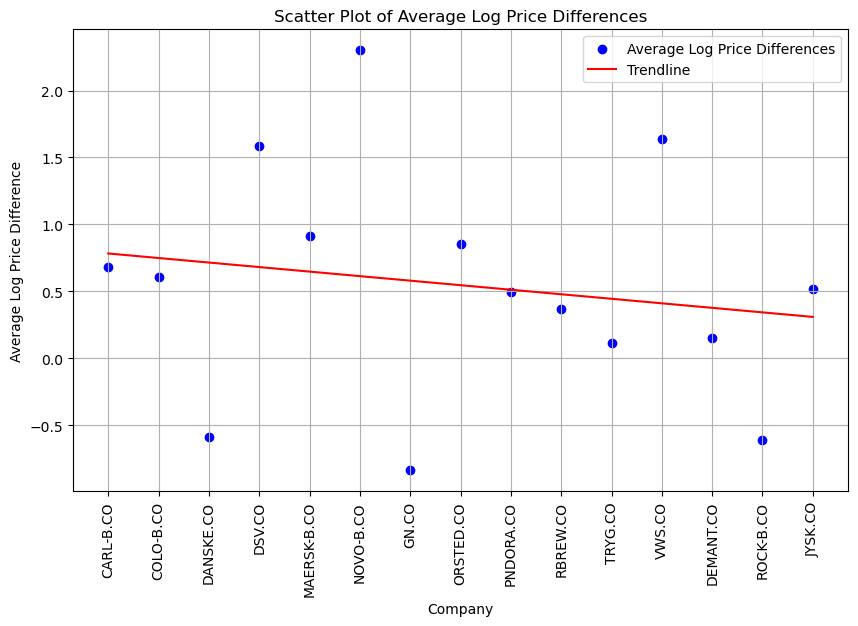

Slope of the trendline: -0.033852568693039715


In [25]:
import numpy as np
import os
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from scipy.stats import linregress
from matplotlib.widgets import CheckButtons


# Define the list of company symbols in the Danish C25 index
c25_companies = [
    'CARL-B.CO', 'COLO-B.CO', 'DANSKE.CO', 'DSV.CO',
    'MAERSK-B.CO', 'NOVO-B.CO', 'GN.CO',
    'ORSTED.CO', 'PNDORA.CO', 'RBREW.CO', 'TRYG.CO',
    'VWS.CO', 'DEMANT.CO', 'ROCK-B.CO', 'JYSK.CO',
]

# Set the start and end dates for the data collection
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=5 * 365)).strftime('%Y-%m-%d')

# Create a directory to store the data
output_dir = 'c25_stock_data'
os.makedirs(output_dir, exist_ok=True)

# Collect stock data for each company
data_collection = {}

for symbol in c25_companies:
    print(f"Collecting data for {symbol}...")
    try:
        # Retrieve the stock data
        data = yf.download(symbol, start=start_date, end=end_date, interval='1mo')

        # Save the data to a CSV file
        filename = f"{output_dir}/{symbol}.csv"
        data.to_csv(filename)

        # Store the data for later use
        data_collection[symbol] = data

        print(f"Data collected for {symbol}")
    except Exception as e:
        print(f"Error collecting data for {symbol}: {e}")
print("Data collection complete.")

# Calculate average log price differences for each company
avg_log_diff_prices = {}

for symbol, data in data_collection.items():
    log_diff = data['Close'].apply(np.log).diff()
    avg_log_diff_prices[symbol] = log_diff.mean() * 100

# Print average log price differences for each company
for symbol, avg_diff in avg_log_diff_prices.items():
    print(f"Average log price difference for {symbol}: {avg_diff}")

# Create subplots for log prices and log price differences with more distance
fig, axs = plt.subplots(2, 1, figsize=(12, 10))
plt.subplots_adjust(hspace=0.8)

# Plot log prices for all companies
axs[0].set_title("Log Prices for C25 Companies")
axs[0].set_xlabel("Date")
axs[0].set_ylabel("Log Price")

for symbol, data in data_collection.items():
    data['Log_Price'] = np.log(data['Close'])
    axs[0].plot(data.index, data['Log_Price'], label=symbol)

axs[0].grid(True)

# Move the legend box to the lower center of the plot, below the date axis
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)

# Plot log price differences for all companies
axs[1].set_title("Log Price Differences for C25 Companies")
axs[1].set_xlabel("Date")
axs[1].set_ylabel("Log Price Difference")

for symbol, data in data_collection.items():
    data['Log_Price_Diff'] = data['Log_Price'].diff()
    axs[1].plot(data.index, data['Log_Price_Diff'], label=symbol)

axs[1].grid(True)

# Move the legend box to the lower center of the plot, below the date axis
axs[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4)

# Display the scatter plot with trendline
plt.figure(figsize=(10, 6))
plt.title("Scatter Plot of Average Log Price Differences")
plt.xlabel("Company")
plt.ylabel("Average Log Price Difference")

x = np.arange(len(c25_companies))
y = list(avg_log_diff_prices.values())

plt.scatter(x, y, color='blue', label="Average Log Price Differences")

# Add trendline
slope, intercept, r_value, p_value, std_err = linregress(x, y)
trendline = intercept + slope * x
plt.plot(x, trendline, color='red', label="Trendline")

plt.xticks(x, c25_companies, rotation='vertical')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()
print("Slope of the trendline:", slope)


In [13]:
esg_scores_file = 'Companies ESG scores2.csv'
esg_scores_data = pd.read_csv(esg_scores_file, delimiter=";")

merged_data = pd.DataFrame({'symbol': c25_companies})

merged_data['Average Log Difference'] = merged_data['symbol'].map(avg_log_diff_prices)
merged_data['ESG Score'] = esg_scores_data['ESG Score']
print(merged_data)

         symbol  Average Log Difference  ESG Score
0     CARL-B.CO                0.681356         77
1     COLO-B.CO                0.607614         75
2     DANSKE.CO               -0.592154         75
3        DSV.CO                1.588815         81
4   MAERSK-B.CO                0.910936         71
5     NOVO-B.CO                2.300267         85
6         GN.CO               -0.838631         74
7     ORSTED.CO                0.850633         76
8     PNDORA.CO                0.495562         77
9      RBREW.CO                0.364757         62
10      TRYG.CO                0.113766         68
11       VWS.CO                1.637976         73
12    DEMANT.CO                0.149016         56
13    ROCK-B.CO               -0.612227         69
14      JYSK.CO                0.519379         53


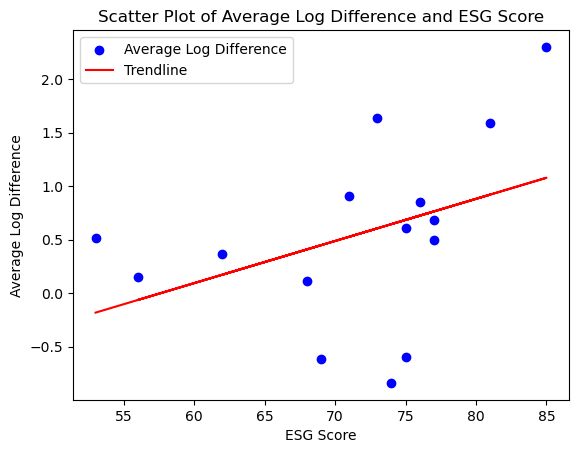

The slope of the trendline is: 0.0394


In [23]:
x = merged_data['ESG Score']
y = merged_data['Average Log Difference']
plt.scatter(x, y, color='blue', label="Average Log Difference")
slope, intercept, r_value, p_value, std_err = linregress(x, y)
trendline = intercept + slope * x
plt.plot(x, trendline, color='red', label="Trendline")
plt.xlabel("ESG Score")
plt.ylabel("Average Log Difference")
plt.title("Scatter Plot of Average Log Difference and ESG Score")
plt.legend()
plt.show()
print('The slope of the trendline is: {:.4f}'.format(slope))


In [37]:
# Calculate average log prices and standard deviations for each company
avg_log_prices = {}
std_log_prices = {}

for symbol, data in data_collection.items():
    log_prices = np.log(data['Close'])
    avg_log_prices[symbol] = log_prices.mean()
    std_log_prices[symbol] = log_prices.std() * 100  # Multiply by 100

    # Print average log price and standard deviation for the current symbol
    print(f"Average log price for {symbol}: {avg_log_prices[symbol]}")
    print(f"Standard deviation for {symbol}: {std_log_prices[symbol]}")

    # Add an empty line for readability
    print()



Average log price for CARL-B.CO: 6.826176116145801
Standard deviation for CARL-B.CO: 12.783472801763606

Average log price for COLO-B.CO: 6.763977168863349
Standard deviation for COLO-B.CO: 17.52044934077859

Average log price for DANSKE.CO: 4.730658859028311
Standard deviation for DANSKE.CO: 20.12798314888347

Average log price for DSV.CO: 6.812253089421295
Standard deviation for DSV.CO: 36.963775503451565

Average log price for MAERSK-B.CO: 9.35389059065098
Standard deviation for MAERSK-B.CO: 40.5804271928217

Average log price for NOVO-B.CO: 6.21739567039148
Standard deviation for NOVO-B.CO: 41.09034053901075

Average log price for GN.CO: 5.7485571652238185
Standard deviation for GN.CO: 36.73798076548028

Average log price for ORSTED.CO: 6.539988296551599
Standard deviation for ORSTED.CO: 28.94223570936661

Average log price for PNDORA.CO: 6.129727007104858
Standard deviation for PNDORA.CO: 39.84016916797653

Average log price for RBREW.CO: 6.3778280147193005
Standard deviation for 